In [194]:
import pandas as pd
import os
import numpy as np
pd.set_option('display.max_columns', 200)

In [3]:
# os.getcwd()

'/Users/macintosh/github/predict_student_performance_from_game_play'

In [4]:
# train_csv = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/train.csv'
# df_train = pd.read_csv(train_csv, dtype_backend = 'pyarrow')

In [195]:
# READ USER ID ONLY
tmp = pd.read_csv("/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/train.csv",usecols=[0])
# This part use to split session_id equal every portion
tmp = tmp.groupby('session_id').session_id.agg('count')

# # COMPUTE READS AND SKIPS
# Plan to devide to 10 part
PIECES = 10
CHUNK = int( np.ceil(len(tmp)/PIECES) ) #--> 2357 records

reads = [] #--> prepare empty list
skips = [0] #-->start add 0 because at the first time no need to skip record
for k in range(PIECES): #--> k = 0 - 9
    a = k*CHUNK #--> 0 * 2357 = 0 this for start from record session_id 0
    b = (k+1)*CHUNK #--> 1 * 2357 = 2357 this for end record session_id at 2357
    if b>len(tmp): b=len(tmp) #--> check b (2357) > 2357 or not this try to make b always increase step = 2357
    r = tmp.iloc[a:b].sum() #--> slide by range of records
    reads.append(r) #--> append number of records each time
    skips.append(skips[-1]+r) # append cummulative each time
    
# print(f'To avoid memory error, we will read train in {PIECES} pieces of sizes:')
# print(reads)

In [196]:
df_train_resize = pd.read_csv('/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/train.csv', nrows=reads[0])
print('Train size of first piece:', df_train_resize.shape )
df_train_resize.head()

Train size of first piece: (2684191, 20)


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [8]:
df_train_resize.shape

(2684191, 20)

In [9]:
df_train_resize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684191 entries, 0 to 2684190
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      int64  
 17  hq              int64  
 18  music           int64  
 19  level_group     object 
dtypes: float64(6), int64(7), object(7)
memory usage: 409.6+ MB


In [10]:
df_train_resize.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [12]:
# df_train_resize.duplicated(subset=['session_id', 'event_name', 'elapsed_time']).sum()

504

In [13]:
# df_train_resize.loc[df_train_resize.duplicated(subset=['session_id', 'event_name'])].head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991405,-157.314686,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485079,-199.971679,593.0,485.0,NaN,"See you later, Teddy.",teddy,tunic.historicalsociety.closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [14]:
# df_train_resize.query('session_id == 20090312431273200 & event_name == "person_click"').head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991405,-157.314686,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [15]:
# df_train_sample = df_train_resize.sample(frac=0.1, random_state=1)

In [16]:
# df_train_resize.query('session_id == 20090312431273200 & event_name == "person_click"')\
#     .groupby(['session_id', 'event_name'])[['session_id']]\
#     .count()\
#     .head()

,,session_id
session_id,event_name,
20090312431273200,person_click,249


In [17]:
# df_train_resize.query('session_id == 20090312431273200 & event_name == "person_click"')\
#     .duplicated(subset=['session_id', 'event_name'])\
#     .sum()

248

In [197]:
train_labels_csv = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/train_labels.csv'
# df_train_labels = pd.read_csv(train_labels_csv, dtype_backend = 'pyarrow')
df_train_labels = pd.read_csv(train_labels_csv)

In [198]:
df_train_labels[df_train_labels['session_id'].str.contains('20090312431273200')].head()

,session_id,correct
0,20090312431273200_q1,1
23562,20090312431273200_q2,1
47124,20090312431273200_q3,1
70686,20090312431273200_q4,1
94248,20090312431273200_q5,1


In [23]:
# first we need to group by in session id and question number (max 18 questions)


In [199]:
test_csv = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/test.csv'
# df_test = pd.read_csv(test_csv, dtype_backend = 'pyarrow')
df_test = pd.read_csv(test_csv)

In [200]:
df_test.tail()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
3723,20090312331414616,1001,1581679,map_hover,basic,22,NaN,NaN,NaN,NaN,NaN,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,0,0,1,13-22,2
3724,20090312331414616,1002,1583044,map_hover,basic,22,NaN,NaN,NaN,NaN,NaN,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,2
3725,20090312331414616,1003,1583410,map_click,undefined,22,NaN,483.726363,-3.880047,456.0,332.0,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,2
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,NaN,192.372139,38.216178,383.0,272.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,2
3727,20090312331414616,1005,1587810,checkpoint,basic,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,2


In [201]:
import pandas as pd
submission_csv = '/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/sample_submission.csv'
# df_submission = pd.read_csv(submission_csv, dtype_backend = 'pyarrow')
df_submission = pd.read_csv(submission_csv)

In [202]:
df_submission['question'] = df_submission.session_id.apply(lambda x: x.split('_')[-1][1:])

In [203]:
#Check which session_level proper for each question for training label?
df_submission.groupby(['session_level', 'question']).count().sort_values(['session_level', 'question'])
# Result is 

session_id  correct
session_level question                     
0             1                  3        3
              2                  3        3
              3                  3        3
1             10                 3        3
              11                 3        3
              12                 3        3
              13                 3        3
              4                  3        3
              5                  3        3
              6                  3        3
              7                  3        3
              8                  3        3
              9                  3        3
2             14                 3        3
              15                 3        3
              16                 3        3
              17                 3        3
              18                 3        3

In [31]:
# Change data from quanlitative to quantitative by use dummies
# just_dummies = pd.get_dummies(df_train_resize['event_name'])


In [42]:
# just_dummies.columns

Index(['checkpoint', 'cutscene_click', 'map_click', 'map_hover',
       'navigate_click', 'notebook_click', 'notification_click',
       'object_click', 'object_hover', 'observation_click', 'person_click'],
      dtype='object')

In [34]:
# df_train_resize = pd.concat([df_train_resize, just_dummies], axis=1) # set axis = 1 for concat in columns

In [35]:
# df_train_resize.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,False,True,False,False,False,False,False,False,False,False,False
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,False,False,False,False,False,False,False,False,False,False,True
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,False,False,False,False,False,False,False,False,False,False,True
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,False,False,False,False,False,False,False,False,False,False,True
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,False,False,False,False,False,False,False,False,False,False,True


In [36]:
# df_train_resize.event_name.value_counts()

event_name
navigate_click        1151606
person_click           606658
cutscene_click         268843
object_click           227641
object_hover           117460
map_hover              105233
notification_click      64639
notebook_click          59363
map_click               53423
observation_click       22222
checkpoint               7103
Name: count, dtype: int64

In [204]:
df_train_labels['question_num'] = df_train_labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))
df_train_labels['session'] = df_train_labels.session_id.apply(lambda x: int(x.split('_')[0]))

In [205]:
df_train_labels.head()

,session_id,correct,question_num,session
0,20090312431273200_q1,1,1,20090312431273200
1,20090312433251036_q1,0,1,20090312433251036
2,20090312455206810_q1,1,1,20090312455206810
3,20090313091715820_q1,0,1,20090313091715820
4,20090313571836404_q1,1,1,20090313571836404


In [206]:
import gc
gc.collect()
df_train_resize.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [856]:
# Set columns for feature engineer
# count_var = ['event_name', 'fqid', 'room_fqid', 'text']
# mean_var = ['elapsed_time', 'level']
# event_var = ['navigate_click', 'person_click', 'cutscene_click', 'object_click', 'map_hover'
# , 'notification_click', 'map_click', 'observation_click', 'checkpoint', 'elapsed_time']
# count_var = ['room_fqid', 'event_comb']
# event_var = ['map_click', 'object_click', 'person_click', 'object_hover'] 
# important_columns = ['tunic_historicalsociety_frontdesk', 'person_click_basic'
# , 'tunic_historicalsociety_stacks', 'tunic_library_frontdesk'
# , 'tunic_historicalsociety_closet_dirty', 'thf_pc'
# , 'map_click_close', 'map_click_basic', 'object_click_close', 'object_click_basic', 'object_hover_basic', 'object_hover_undefined'
# , 'thf_ncu', 'thf_ocb', 'thf_ncc', 'thf_ncb', 'thf_nco', 'thf_ncp', 'thf_ncn'
# , 'navigate_click_undefined', 'observation_click_basic', 'notebook_click_close', 'notebook_click_basic'
# , 'notebook_click_open', 'notebook_click_prev', 'notebook_click_next']
# , 'thf_mcc', 'thf_mcb', 'thf_mcu', 'thf_occ', 'thf_ocb', 'thf_ohb', 'thf_ohu'
new_features_columns = ['cutscene_click',
'person_click',
'navigate_click',
'observation_click',
'notification_click',
'object_click',
'object_hover',
'map_hover',
'map_click',
'checkpoint',
'notebook_click',
'cutscene_click_basic',
'person_click_basic',
'navigate_click_undefined',
'observation_click_basic',
'notification_click_basic',
'object_click_close',
'object_hover_basic',
'object_click_basic',
'object_hover_undefined',
'map_hover_basic',
'map_click_undefined',
'checkpoint_basic',
'map_click_close',
'notebook_click_open',
'notebook_click_close',
'map_click_basic',
'notebook_click_basic',
'notebook_click_prev',
'notebook_click_next',
'tunic_historicalsociety_closet',
'tunic_historicalsociety_basement',
'tunic_historicalsociety_entry',
'tunic_historicalsociety_collection',
'tunic_historicalsociety_stacks',
'tunic_kohlcenter_halloffame',
'tunic_capitol_0_hall',
'tunic_historicalsociety_closet_dirty',
'tunic_historicalsociety_frontdesk',
'tunic_humanecology_frontdesk',
'tunic_drycleaner_frontdesk',
'tunic_library_frontdesk',
'tunic_library_microfiche',
'tunic_capitol_1_hall',
'tunic_historicalsociety_cage',
'tunic_historicalsociety_collection_flag',
'tunic_wildlife_center',
'tunic_flaghouse_entry',
'tunic_capitol_2_hall']

In [ ]:
# most important features 
# 1. sum_tunic_historicalsociety_frontdesk --> dig dawn for this room and extract event type --> score improve to 0.681
# 2. sum_person_click_basic
# 3. sum_person_click
# 4. sum_tunic_historicalsociety_stacks
# 5. sum_tunic_library_frontdesk
# 6. sum_tunic_historicalsociety_closet_dirty

In [786]:
# # Function for 5 important features
# def tunic_historicalsociety_frontdesk(data):
#     if data == 'tunic.historicalsociety.frontdesk':
#         return True
#     return False
# def person_click_basic(data):
#     if data == 'person_click_basic':
#         return True
#     return False
# def tunic_historicalsociety_stacks(data):
#     if data == 'tunic.historicalsociety.stacks':
#         return True
#     return False
# def tunic_library_frontdesk(data):
#     if data == 'tunic.library.frontdesk':
#         return True
#     return False
# def tunic_historicalsociety_closet_dirty(data):
#     if data == 'tunic.historicalsociety.closet.dirty':
#         return True
#     return False

# def map_click_close(data):
#     if data == 'map_click_close':
#         return True
#     return False
# def map_click_basic(data):
#     if data == 'map_click_basic':
#         return True
#     return False
# def map_click_undefined(data):
#     if data == 'map_click_undefined':
#         return True
#     return False
# def object_click_close(data):
#     if data == 'object_click_close':
#         return True
#     return False
# def object_click_basic(data):
#     if data == 'object_click_basic':
#         return True
#     return False
# def object_hover_basic(data):
#     if data == 'object_hover_basic':
#         return True
#     return False
# def object_hover_undefined(data):
#     if data == 'object_hover_undefined':
#         return True
#     return False

# def navigate_click_undefined(data):
#     if data == 'navigate_click_undefined':
#         return True
#     return False
# def observation_click_basic(data):
#     if data == 'observation_click_basic':
#         return True
#     return False
# def notebook_click_close(data):
#     if data == 'notebook_click_close':
#         return True
#     return False
# def notebook_click_basic(data):
#     if data == 'notebook_click_basic':
#         return True
#     return False
# def notebook_click_open(data):
#     if data == 'notebook_click_open':
#         return True
#     return False
# def notebook_click_prev(data):
#     if data == 'notebook_click_prev':
#         return True
#     return False
# def notebook_click_next(data):
#     if data == 'notebook_click_next':
#         return True
#     return False

In [854]:
# Aggregate feature engineer in session_id and level_group level
# Add feature engineering 
# 1. time in each level group
def feature_engineer(train):
    dfs = []
    # for c in count_var:
    #     tmp = train.groupby(['session_id', 'level_group'])[c].agg('nunique')
    #     tmp.name = tmp.name + '_nunique'
    #     dfs.append(tmp)
    # for c in mean_var:
    #     tmp = train.groupby(['session_id', 'level_group'])[c].agg('mean')
    #     tmp.name = 'avg_' + tmp.name
    #     dfs.append(tmp)
    tmp = train.groupby(['session_id', 'level_group']).elapsed_time.agg({'min', 'max'})
    tmp['time_diff'] = tmp['max']-tmp['min']
    dfs.append(tmp['time_diff'])
    # for c in event_var:
    #     tmp[f'sum_{c}'] = train.groupby(['session_id', 'level_group'])[c].agg('sum')
    #     dfs.append(tmp[f'sum_{c}'])
    # for c in important_columns:
    #     tmp[f'sum_{c}'] = train.groupby(['session_id', 'level_group'])[c].agg('sum')
    #     dfs.append(tmp[f'sum_{c}'])
    # for c in event_name_columns:
    #     tmp[f'sum_{c}'] = train.groupby(['session_id', 'level_group'])[c].agg('sum')
    #     dfs.append(tmp[f'sum_{c}'])
    # for c in event_comb_columns:
    #     tmp[f'sum_{c}'] = train.groupby(['session_id', 'level_group'])[c].agg('sum')
    #     dfs.append(tmp[f'sum_{c}'])
    # for c in room_fqid_columns:
    #     tmp[f'sum_{c}'] = train.groupby(['session_id', 'level_group'])[c].agg('sum')
    #     dfs.append(tmp[f'sum_{c}'])
    for c in new_features_columns:
        tmp[f'sum_{c}'] = train.groupby(['session_id', 'level_group'])[c].agg('sum')
        dfs.append(tmp[f'sum_{c}'])
    tmp = train.groupby(['session_id', 'level_group']).event_comb.agg('nunique')
    tmp.name = tmp.name + '_nunique'
    dfs.append(tmp)

    df = pd.concat(dfs, axis=1)
    df = df.fillna(-1) # fill na with -1 
    df = df.reset_index()
    df = df.set_index('session_id')
    return df
    

In [606]:
# def thf_pc(room, event):
#     if str(room) == 'tunic.historicalsociety.frontdesk' and str(event) == 'person_click':
#         return True
#     return False

In [850]:
# Test adjust multiple name
# test = pd.get_dummies(df_train_resize['event_name']).columns
# df_train_resize.groupby(['session_id', 'level_group'])[test].sum().rename(columns=lambda x: 'sum_' + x)

# (df_train_resize['event_name'] + '_' + df_train_resize['name']).unique()

# df_train_resize[df_train_resize['event_name']=='checkpoint'].groupby(['session_id','event_name', 'name']).size().reset_index().sort_values(0, ascending=False)
# df_train_resize.name.unique()

# df_train_resize.query('session_id == 20110210172544770 & room_fqid == "tunic.historicalsociety.frontdesk"').event_name.unique()
# df_train_resize.query('room_fqid == "tunic.historicalsociety.frontdesk"').event_name.unique()
# df_train_resize.query('room_fqid == "tunic.historicalsociety.frontdesk" & event_name == "person_click"').apply(lambda x: thf_pc(x.room_fqid, x.event_name), axis=1).sum()
# df_train_resize.query('room_fqid != "tunic.historicalsociety.frontdesk" & event_name == "person_click"')
# df_train_resize.apply(lambda x: thf_pc(x.room_fqid, x.event_name), axis=1).sum()
# df_train_resize.query('session_id == 20110210172544770 & event_name == "checkpoint"')
df_train_resize.event_name.unique()
# Check sort_values

# session_list = [20090312431273200, 20090312433251036, 20090312455206810]

# df_train_resize.query(f'session_id in {session_list} & event_name == "checkpoint"').sort_values(['session_id', 'elapsed_time'])

# df_train_resize[df_train_resize.fqid.str.contains('chap') & ~df_train_resize['fqid'].isna()].groupby('session_id').fqid.size().sort_values(ascending=True)

# ['navigate_click', 'person_click', 'observation_click', 'notebook_click']



array(['cutscene_click', 'person_click', 'navigate_click',
       'observation_click', 'notification_click', 'object_click',
       'object_hover', 'map_hover', 'map_click', 'checkpoint',
       'notebook_click'], dtype=object)

In [664]:
a = pd.DataFrame([True, True], [True, False]).reset_index().rename(columns={'index':'a', 0:'b'})
a['a'] * a['b']

0     True
1    False
dtype: bool

In [330]:
df_tr.shape

(70686, 43)

In [851]:
# Event name 
def cutscene_click(data):
    if data == 'cutscene_click':
        return True
    return False
def person_click(data):
    if data == 'person_click':
        return True
    return False
def navigate_click(data):
    if data == 'navigate_click':
        return True
    return False
def observation_click(data):
    if data == 'observation_click':
        return True
    return False
def notification_click(data):
    if data == 'notification_click':
        return True
    return False
def object_click(data):
    if data == 'object_click':
        return True
    return False
def object_hover(data):
    if data == 'object_hover':
        return True
    return False
def map_hover(data):
    if data == 'map_hover':
        return True
    return False
def map_click(data):
    if data == 'map_click':
        return True
    return False
def checkpoint(data):
    if data == 'checkpoint':
        return True
    return False
def notebook_click(data):
    if data == 'notebook_click':
        return True
    return False

# Event name + name
def cutscene_click_basic(data):
    if data == 'cutscene_click_basic':
        return True
    return False
def person_click_basic(data):
    if data == 'person_click_basic':
        return True
    return False
def navigate_click_undefined(data):
    if data == 'navigate_click_undefined':
        return True
    return False
def observation_click_basic(data):
    if data == 'observation_click_basic':
        return True
    return False
def notification_click_basic(data):
    if data == 'notification_click_basic':
        return True
    return False
def object_click_close(data):
    if data == 'object_click_close':
        return True
    return False
def object_hover_basic(data):
    if data == 'object_hover_basic':
        return True
    return False
def object_click_basic(data):
    if data == 'object_click_basic':
        return True
    return False
def object_hover_undefined(data):
    if data == 'object_hover_undefined':
        return True
    return False
def map_hover_basic(data):
    if data == 'map_hover_basic':
        return True
    return False
def map_click_undefined(data):
    if data == 'map_click_undefined':
        return True
    return False
def checkpoint_basic(data):
    if data == 'checkpoint_basic':
        return True
    return False
def map_click_close(data):
    if data == 'map_click_close':
        return True
    return False
def notebook_click_open(data):
    if data == 'notebook_click_open':
        return True
    return False
def notebook_click_close(data):
    if data == 'notebook_click_close':
        return True
    return False
def map_click_basic(data):
    if data == 'map_click_basic':
        return True
    return False
def notebook_click_basic(data):
    if data == 'notebook_click_basic':
        return True
    return False
def notebook_click_prev(data):
    if data == 'notebook_click_prev':
        return True
    return False
def notebook_click_next(data):
    if data == 'notebook_click_next':
        return True
    return False

# Room fqid
def tunic_historicalsociety_closet(data):
    if data == 'tunic.historicalsociety.closet':
        return True
    return False
def tunic_historicalsociety_basement(data):
    if data == 'tunic.historicalsociety.basement':
        return True
    return False
def tunic_historicalsociety_entry(data):
    if data == 'tunic.historicalsociety.entry':
        return True
    return False
def tunic_historicalsociety_collection(data):
    if data == 'tunic.historicalsociety.collection':
        return True
    return False
def tunic_historicalsociety_stacks(data):
    if data == 'tunic.historicalsociety.stacks':
        return True
    return False
def tunic_kohlcenter_halloffame(data):
    if data == 'tunic.kohlcenter.halloffame':
        return True
    return False
def tunic_capitol_0_hall(data):
    if data == 'tunic.capitol_0.hall':
        return True
    return False
def tunic_historicalsociety_closet_dirty(data):
    if data == 'tunic.historicalsociety.closet_dirty':
        return True
    return False
def tunic_historicalsociety_frontdesk(data):
    if data == 'tunic.historicalsociety.frontdesk':
        return True
    return False
def tunic_humanecology_frontdesk(data):
    if data == 'tunic.humanecology.frontdesk':
        return True
    return False
def tunic_drycleaner_frontdesk(data):
    if data == 'tunic.drycleaner.frontdesk':
        return True
    return False
def tunic_library_frontdesk(data):
    if data == 'tunic.library.frontdesk':
        return True
    return False
def tunic_library_microfiche(data):
    if data == 'tunic.library.microfiche':
        return True
    return False
def tunic_capitol_1_hall(data):
    if data == 'tunic.capitol_1.hall':
        return True
    return False
def tunic_historicalsociety_cage(data):
    if data == 'tunic.historicalsociety.cage':
        return True
    return False
def tunic_historicalsociety_collection_flag(data):
    if data == 'tunic.historicalsociety.collection_flag':
        return True
    return False
def tunic_wildlife_center(data):
    if data == 'tunic.wildlife.center':
        return True
    return False
def tunic_flaghouse_entry(data):
    if data == 'tunic.flaghouse.entry':
        return True
    return False
def tunic_capitol_2_hall(data):
    if data == 'tunic.capitol_2.hall':
        return True
    return False

In [857]:
# Process Train Data in Pieces
all_pieces = []
print(f'Processing train as {PIECES} pieces to avoid memory error...')
for k in range(PIECES):
    print(k, ', ',end='')
    SKIPS = 0
    if k>0: SKIPS = range(1, skips[k]+1) #--> for skiprows parameter start at 1 and if need use range must + 1 because this will exclude end range number
    train = pd.read_csv('/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/train.csv'
    , nrows=reads[k], skiprows=SKIPS).sort_values(['session_id', 'elapsed_time'])
    train['event_comb'] = train['event_name'] + '_' + train['name']
    df_dummies = pd.get_dummies(train['event_name'])
    room_fqid_encode = pd.get_dummies(train['room_fqid']).rename(columns=lambda x: x.replace('.','_'))
    event_comb_encode = pd.get_dummies(train['event_comb']).rename(columns=lambda x: x.replace('.','_'))
    train = pd.concat([train, df_dummies, room_fqid_encode, event_comb_encode], axis=1)

    train['cutscene_click'] = train['event_name'].apply(lambda x: cutscene_click(x))
    train['person_click'] = train['event_name'].apply(lambda x: person_click(x))
    train['navigate_click'] = train['event_name'].apply(lambda x: navigate_click(x))
    train['observation_click'] = train['event_name'].apply(lambda x: observation_click(x))
    train['notification_click'] = train['event_name'].apply(lambda x: notification_click(x))
    train['object_click'] = train['event_name'].apply(lambda x: object_click(x))
    train['object_hover'] = train['event_name'].apply(lambda x: object_hover(x))
    train['map_hover'] = train['event_name'].apply(lambda x: map_hover(x))
    train['map_click'] = train['event_name'].apply(lambda x: map_click(x))
    train['checkpoint'] = train['event_name'].apply(lambda x: checkpoint(x))
    train['notebook_click'] = train['event_name'].apply(lambda x: notebook_click(x))

    train['cutscene_click_basic'] = train['event_comb'].apply(lambda x: cutscene_click_basic(x))
    train['person_click_basic'] = train['event_comb'].apply(lambda x: person_click_basic(x))
    train['navigate_click_undefined'] = train['event_comb'].apply(lambda x: navigate_click_undefined(x))
    train['observation_click_basic'] = train['event_comb'].apply(lambda x: observation_click_basic(x))
    train['notification_click_basic'] = train['event_comb'].apply(lambda x: notification_click_basic(x))
    train['object_click_close'] = train['event_comb'].apply(lambda x: object_click_close(x))
    train['object_hover_basic'] = train['event_comb'].apply(lambda x: object_hover_basic(x))
    train['object_click_basic'] = train['event_comb'].apply(lambda x: object_click_basic(x))
    train['object_hover_undefined'] = train['event_comb'].apply(lambda x: object_hover_undefined(x))
    train['map_hover_basic'] = train['event_comb'].apply(lambda x: map_hover_basic(x))
    train['map_click_undefined'] = train['event_comb'].apply(lambda x: map_click_undefined(x))
    train['checkpoint_basic'] = train['event_comb'].apply(lambda x: checkpoint_basic(x))
    train['map_click_close'] = train['event_comb'].apply(lambda x: map_click_close(x))
    train['notebook_click_open'] = train['event_comb'].apply(lambda x: notebook_click_open(x))
    train['notebook_click_close'] = train['event_comb'].apply(lambda x: notebook_click_close(x))
    train['map_click_basic'] = train['event_comb'].apply(lambda x: map_click_basic(x))
    train['notebook_click_basic'] = train['event_comb'].apply(lambda x: notebook_click_basic(x))
    train['notebook_click_prev'] = train['event_comb'].apply(lambda x: notebook_click_prev(x))
    train['notebook_click_next'] = train['event_comb'].apply(lambda x: notebook_click_next(x))

    train['tunic_historicalsociety_closet'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_closet(x))
    train['tunic_historicalsociety_basement'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_basement(x))
    train['tunic_historicalsociety_entry'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_entry(x))
    train['tunic_historicalsociety_collection'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_collection(x))
    train['tunic_historicalsociety_stacks'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_stacks(x))
    train['tunic_kohlcenter_halloffame'] = train['room_fqid'].apply(lambda x: tunic_kohlcenter_halloffame(x))
    train['tunic_capitol_0_hall'] = train['room_fqid'].apply(lambda x: tunic_capitol_0_hall(x))
    train['tunic_historicalsociety_closet_dirty'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_closet_dirty(x))
    train['tunic_historicalsociety_frontdesk'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_frontdesk(x))
    train['tunic_humanecology_frontdesk'] = train['room_fqid'].apply(lambda x: tunic_humanecology_frontdesk(x))
    train['tunic_drycleaner_frontdesk'] = train['room_fqid'].apply(lambda x: tunic_drycleaner_frontdesk(x))
    train['tunic_library_frontdesk'] = train['room_fqid'].apply(lambda x: tunic_library_frontdesk(x))
    train['tunic_library_microfiche'] = train['room_fqid'].apply(lambda x: tunic_library_microfiche(x))
    train['tunic_capitol_1_hall'] = train['room_fqid'].apply(lambda x: tunic_capitol_1_hall(x))
    train['tunic_historicalsociety_cage'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_cage(x))
    train['tunic_historicalsociety_collection_flag'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_collection_flag(x))
    train['tunic_wildlife_center'] = train['room_fqid'].apply(lambda x: tunic_wildlife_center(x))
    train['tunic_flaghouse_entry'] = train['room_fqid'].apply(lambda x: tunic_flaghouse_entry(x))
    train['tunic_capitol_2_hall'] = train['room_fqid'].apply(lambda x: tunic_capitol_2_hall(x))
    
    # room_fqid_columns = [x.replace('.','_') for x in list(train['room_fqid'].unique())]
    # event_comb_columns = [x.replace('.','_') for x in list(train['event_comb'].unique())]
    # event_name_columns = [x.replace('.','_') for x in list(train['event_name'].unique())]
    df = feature_engineer(train)
    all_pieces.append(df)
# Concatenate all pieces
print('\n')
del train; gc.collect()
df_tr = pd.concat(all_pieces, axis=0)
print('Shape of all train data after feature engineering:', df_tr.shape)
df_tr.head()
    

Processing train as 10 pieces to avoid memory error...
0 , 1 , 2 , 3 , 4 , 

In [825]:
# Process Train Data in Pieces
# all_pieces = []
# print(f'Processing train as {PIECES} pieces to avoid memory error...')
# for k in range(PIECES):
#     print(k, ', ',end='')
#     SKIPS = 0
#     if k>0: SKIPS = range(1, skips[k]+1) #--> for skiprows parameter start at 1 and if need use range must + 1 because this will exclude end range number
#     train = pd.read_csv('/Users/macintosh/Desktop/data_completitions/Kaggle/2023/predict-student-performance-from-game-play/train.csv'
#     , nrows=reads[k], skiprows=SKIPS).sort_values(['session_id', 'elapsed_time'])
#     train['event_comb'] = train['event_name'] + '_' + train['name']
#     df_dummies = pd.get_dummies(train['event_name'])
#     room_fqid_encode = pd.get_dummies(train['room_fqid']).rename(columns=lambda x: x.replace('.','_'))
#     event_comb_encode = pd.get_dummies(train['event_comb']).rename(columns=lambda x: x.replace('.','_'))
#     train = pd.concat([train, df_dummies, room_fqid_encode, event_comb_encode], axis=1)
    
    # most important features 
    # train['tunic_historicalsociety_frontdesk'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_frontdesk(x))
    # train['person_click_basic'] = train['event_comb'].apply(lambda x: person_click_basic(x))
    # train['tunic_historicalsociety_stacks'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_stacks(x))
    # train['tunic_library_frontdesk'] = train['room_fqid'].apply(lambda x: tunic_library_frontdesk(x))
    # train['tunic_historicalsociety_closet_dirty'] = train['room_fqid'].apply(lambda x: tunic_historicalsociety_closet_dirty(x))
    # New features
    # train['map_click_close'] = train['event_comb'].apply(lambda x: map_click_close(x))
    # train['map_click_basic'] = train['event_comb'].apply(lambda x: map_click_basic(x))
    # train['map_click_undefined'] = train['event_comb'].apply(lambda x: map_click_undefined(x))
    # train['object_click_close'] = train['event_comb'].apply(lambda x: object_click_close(x))
    # train['object_click_basic'] = train['event_comb'].apply(lambda x: object_click_basic(x))
    # train['object_hover_basic'] = train['event_comb'].apply(lambda x: object_hover_basic(x))
    # train['object_hover_undefined'] = train['event_comb'].apply(lambda x: object_hover_undefined(x))

    # train['navigate_click_undefined'] = train['event_comb'].apply(lambda x: navigate_click_undefined(x))
    # train['observation_click_basic'] = train['event_comb'].apply(lambda x: observation_click_basic(x))
    # train['notebook_click_close'] = train['event_comb'].apply(lambda x: notebook_click_close(x))
    # train['notebook_click_basic'] = train['event_comb'].apply(lambda x: notebook_click_basic(x))
    # train['notebook_click_open'] = train['event_comb'].apply(lambda x: notebook_click_open(x))
    # train['notebook_click_prev'] = train['event_comb'].apply(lambda x: notebook_click_prev(x))
    # train['notebook_click_next'] = train['event_comb'].apply(lambda x: notebook_click_next(x))

    # train['thf_pc'] = train['tunic_historicalsociety_frontdesk'] * train['person_click_basic']
    # train['thf_ncu'] = train['tunic_historicalsociety_frontdesk'] * train['navigate_click_undefined']
    # train['thf_ocb'] = train['tunic_historicalsociety_frontdesk'] * train['observation_click_basic']
    # train['thf_ncc'] = train['tunic_historicalsociety_frontdesk'] * train['notebook_click_close']
    # train['thf_ncb'] = train['tunic_historicalsociety_frontdesk'] * train['notebook_click_basic']
    # train['thf_nco'] = train['tunic_historicalsociety_frontdesk'] * train['notebook_click_open']
    # train['thf_ncp'] = train['tunic_historicalsociety_frontdesk'] * train['notebook_click_prev']
    # train['thf_ncn'] = train['tunic_historicalsociety_frontdesk'] * train['notebook_click_next']


    # train['thf_mcc'] = train['tunic_historicalsociety_frontdesk'] * train['map_click_close']
    # train['thf_mcb'] = train['tunic_historicalsociety_frontdesk'] * train['map_click_basic']
    # train['thf_mcu'] = train['tunic_historicalsociety_frontdesk'] * train['map_click_undefined']
    # train['thf_occ'] = train['tunic_historicalsociety_frontdesk'] * train['object_click_close']
    # train['thf_ocb'] = train['tunic_historicalsociety_frontdesk'] * train['object_click_basic']
    # train['thf_ohb'] = train['tunic_historicalsociety_frontdesk'] * train['object_hover_basic']
    # train['thf_ohu'] = train['tunic_historicalsociety_frontdesk'] * train['object_hover_undefined']
    
#     room_fqid_columns = [x.replace('.','_') for x in list(train['room_fqid'].unique())]
#     event_comb_columns = [x.replace('.','_') for x in list(train['event_comb'].unique())]
#     event_name_columns = [x.replace('.','_') for x in list(train['event_name'].unique())]
#     df = feature_engineer(train)
#     all_pieces.append(df)
# # Concatenate all pieces
# print('\n')
# del train; gc.collect()
# df_tr = pd.concat(all_pieces, axis=0)
# print('Shape of all train data after feature engineering:', df_tr.shape)
# df_tr.head()
    

Processing train as 10 pieces to avoid memory error...
0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 

Shape of all train data after feature engineering: (70686, 52)


,level_group,time_diff,sum_cutscene_click,sum_person_click,sum_navigate_click,sum_observation_click,sum_notification_click,sum_object_click,sum_object_hover,sum_map_hover,sum_map_click,sum_checkpoint,sum_notebook_click,sum_cutscene_click_basic,sum_person_click_basic,sum_navigate_click_undefined,sum_observation_click_basic,sum_notification_click_basic,sum_object_click_close,sum_object_hover_basic,sum_object_click_basic,sum_object_hover_undefined,sum_map_hover_basic,sum_map_click_undefined,sum_checkpoint_basic,sum_map_click_close,sum_notebook_click_open,sum_notebook_click_close,sum_map_click_basic,sum_notebook_click_basic,sum_notebook_click_prev,sum_notebook_click_next,sum_tunic_historicalsociety_closet,sum_tunic_historicalsociety_basement,sum_tunic_historicalsociety_entry,sum_tunic_historicalsociety_collection,sum_tunic_historicalsociety_stacks,sum_tunic_kohlcenter_halloffame,sum_tunic_capitol_0_hall,sum_tunic_historicalsociety_closet_dirty,sum_tunic_historicalsociety_frontdesk,sum_tunic_humanecology_frontdesk,sum_tunic_drycleaner_frontdesk,sum_tunic_library_frontdesk,sum_tunic_library_microfiche,sum_tunic_capitol_1_hall,sum_tunic_historicalsociety_cage,sum_tunic_historicalsociety_collection_flag,sum_tunic_wildlife_center,sum_tunic_flaghouse_entry,sum_tunic_capitol_2_hall,event_comb_nunique
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,194860,28,22,81,4,8,11,4,4,2,1,0,28,22,81,4,8,6,2,5,2,4,2,1,0,0,0,0,0,0,0,47,8,41,30,4,33,2,0,0,0,0,0,0,0,0,0,0,0,0,12
20090312431273200,13-22,435947,60,123,170,3,10,20,13,14,6,1,0,60,123,170,3,10,5,2,15,11,14,6,1,0,0,0,0,0,0,0,0,43,62,0,16,0,0,0,16,0,0,27,13,10,83,12,104,32,2,12
20090312431273200,5-12,277750,12,104,103,1,9,28,21,9,8,1,0,12,104,103,1,9,5,2,23,19,9,7,1,1,0,0,0,0,0,0,0,2,20,0,22,0,9,50,57,44,33,31,15,13,0,0,0,0,0,13
20090312433251036,0-4,233752,36,18,49,2,5,15,5,3,3,1,2,36,18,49,2,5,4,0,11,5,3,2,1,0,1,1,1,0,0,0,24,1,47,33,0,32,2,0,0,0,0,0,0,0,0,0,0,0,0,14
20090312433251036,13-22,2638851,65,145,637,5,14,83,66,186,45,1,50,65,145,637,5,14,17,4,66,62,186,34,1,3,19,19,8,10,1,1,0,46,196,0,105,104,0,24,29,77,59,95,40,6,92,39,157,51,177,19


In [186]:
df_train_resize.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,checkpoint,cutscene_click,map_click,map_hover,navigate_click,notebook_click,notification_click,object_click,object_hover,observation_click,person_click
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,False,True,False,False,False,False,False,False,False,False,False
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,False,False,False,False,False,False,False,False,False,False,True
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,False,False,False,False,False,False,False,False,False,False,True
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,False,False,False,False,False,False,False,False,False,False,True
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,False,False,False,False,False,False,False,False,False,False,True


In [218]:
# room_fqid_encode = pd.get_dummies(df_train_resize['room_fqid']).rename(columns=lambda x: x.replace('.','_'))
# [x.replace('.', '_') for x in list(df_train_resize['room_fqid'].unique())]
# df_train_resize['room_fqid'].cat.codes
# df_train_resize['room_fqid'].astype('category').cat.codes

['tunic_historicalsociety_closet',
 'tunic_historicalsociety_basement',
 'tunic_historicalsociety_entry',
 'tunic_historicalsociety_collection',
 'tunic_historicalsociety_stacks',
 'tunic_kohlcenter_halloffame',
 'tunic_capitol_0_hall',
 'tunic_historicalsociety_closet_dirty',
 'tunic_historicalsociety_frontdesk',
 'tunic_humanecology_frontdesk',
 'tunic_drycleaner_frontdesk',
 'tunic_library_frontdesk',
 'tunic_library_microfiche',
 'tunic_capitol_1_hall',
 'tunic_historicalsociety_cage',
 'tunic_historicalsociety_collection_flag',
 'tunic_wildlife_center',
 'tunic_flaghouse_entry',
 'tunic_capitol_2_hall']

In [150]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# features = [i for i in final_df.columns if i not in ['session_id_x', 'level_group', 'session_id_y', 'correct', 'session', 'question_num']]
# fs = SelectKBest(score_func=f_classif, k=5)
# fs.fit_transform(final_df[features], final_df['correct'])
# cols_idxs = fs.get_support(indices=True)
# features_df_new = final_df[features].iloc[:,cols_idxs]
# selected_features = list(features_df_new.columns)
# selected_features

['room_fqid_nunique',
 'sum_map_click',
 'sum_object_click',
 'sum_object_hover',
 'sum_person_click']

In [224]:
# df_train_resize.hover_duration.unique()

array([   nan,  7899.,   400., ...,  3660., 17933., 16183.])

In [238]:
# df_train_resize[~df_train_resize.hover_duration.isna()].event_name.unique()

array(['object_hover', 'map_hover'], dtype=object)

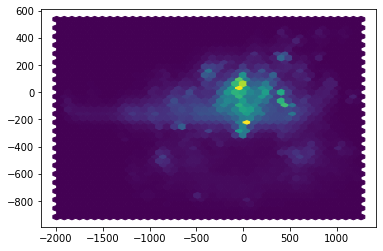

In [219]:
x = df_train_resize['room_coor_x']
y = df_train_resize['room_coor_y']
plt.hexbin(x, y, gridsize=40)
plt.show()

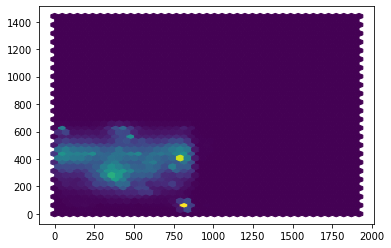

In [218]:
x = df_train_resize['screen_coor_x']
y = df_train_resize['screen_coor_y']
plt.hexbin(x, y, gridsize=40)
plt.show()

In [ ]:
FEATURES = [c for c in df_tr.columns if c != 'level_group']
# FEATURES_NEW = selected_features
# ALL_USERS = df_tr.index.unique()
# FEATURES_NEW.append('level_group')
# df_tr.head()
# FEATURES[:25]
# FEATURES[25:]
FEATURES


['sum_notebook_click_open',
 'sum_notebook_click_close',
 'sum_map_click_basic',
 'sum_notebook_click_basic',
 'sum_notebook_click_prev',
 'sum_notebook_click_next',
 'sum_tunic_historicalsociety_closet',
 'sum_tunic_historicalsociety_basement',
 'sum_tunic_historicalsociety_entry',
 'sum_tunic_historicalsociety_collection',
 'sum_tunic_historicalsociety_stacks',
 'sum_tunic_kohlcenter_halloffame',
 'sum_tunic_capitol_0_hall',
 'sum_tunic_historicalsociety_closet_dirty',
 'sum_tunic_historicalsociety_frontdesk',
 'sum_tunic_humanecology_frontdesk',
 'sum_tunic_drycleaner_frontdesk',
 'sum_tunic_library_frontdesk',
 'sum_tunic_library_microfiche',
 'sum_tunic_capitol_1_hall',
 'sum_tunic_historicalsociety_cage',
 'sum_tunic_historicalsociety_collection_flag',
 'sum_tunic_wildlife_center',
 'sum_tunic_flaghouse_entry',
 'sum_tunic_capitol_2_hall',
 'event_comb_nunique']

In [766]:
df_tr.shape

(70686, 22)

In [827]:
# Group k Fold split data
from sklearn.model_selection import KFold, GroupKFold
import numpy as np
gkf = GroupKFold(n_splits=5)
oof = pd.DataFrame(data=np.zeros((len(ALL_USERS), 18)), index=ALL_USERS) # set all users to 18 columns as each question & set index to session_id
model = {}

In [828]:
oof.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20090312433251036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20090312455206810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20090313091715820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20090313571836404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [829]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [830]:
# Compute CV score with 5 group k fold
final_list = []
for i, (train_idex, test_index) in enumerate(gkf.split(X= df_tr, groups=df_tr.index)): # we already define index (sesion_id) for group to split here.
    # Here we know which fold contains which index, then use index to slice data in each fold.
    print('-'*25)
    print('--- Fold', i+1)
    print('-'*25)

    lgb_params = {
        'objective': 'binary',
        'metric': 'auc',
        'learning': 0.002,
        'max_depth': 6,
        'num_iterations': 1000
    }

    # xgb_params = {
    #     'objective' : 'binary:logistic',
    #     'eval_metric' : 'logloss',
    #     'learning_rate' : 0.05,
    #     'max_depth' : 4,
    #     'n_estimators' : 1000,
    #     'early_stopping_rounds' : 50,
    #     'tree_method' : 'hist',
    #     'subsample' : 0.8,
    #     'colsample_bytree' : 0.4,
    #     'use_label_encoder' : False
    # }

    # Iterate thru questions 1 thru 18
    # Create data set for train each question
    for t in range(1,19):
        print(t, ',', end= ' ')

        # Use this train data with these questions
        # clarify each question to assign group for slice data in df
        if t<=3: grp = '0-4'
        elif t<=13: grp = '5-12'
        elif t<=22: grp = '13-22'

        # Train data
        train_x = df_tr.iloc[train_idex] # get train from index in each fold
        train_x = train_x.loc[train_x.level_group == grp] # get train only each question that match group, slice this again because data in level session_id & level_grop
        train_users = train_x.index.values # get all users train in each fold
        train_y = df_train_labels.loc[df_train_labels.question_num==t].set_index('session').loc[train_users] # get train variable y in each question.
        

        # Valid data
        valid_x = df_tr.iloc[test_index]
        valid_x = valid_x.loc[valid_x.level_group == grp]
        valid_users = valid_x.index.values
        valid_y = df_train_labels.loc[df_train_labels.question_num==t].set_index('session').loc[valid_users]
        

        # Train Model
        clf = LGBMClassifier(**lgb_params)
        clf.fit(train_x[FEATURES].astype('float32'), train_y['correct'])

        # Train XGBosst
        # clf = XGBClassifier(**xgb_params)
        # clf.fit(train_x[FEATURES].astype('float32'), train_y['correct'],
        #     eval_set=[(valid_x[FEATURES].astype('float32'), valid_y['correct'].astype('float32'))],
        #     verbose=0
        # )
        # print(f'{t}({clf.best_ntree_limit}), ', end='')
        

        # Save model
        model[f'{grp}_{t}'] = clf # Set model name
        oof.loc[valid_users, t-1] = clf.predict_proba(valid_x[FEATURES].astype('float32'))[:,1] # Assign predict value to oof table in each question
        # above out put is list such as [0.45779951 0.54220049] position 1 (class 0) is 0.45 position 2 (class 1) is 0.54 total is 1
        # we use [:, 1] because we predict correct = 1 is class 1 then set to [:, 1] instead of [:, 0]
print()



-------------------------
--- Fold 1
-------------------------
1 , [LightGBM] [Warning] Unknown parameter: learning
2 , [LightGBM] [Warning] Unknown parameter: learning
3 , [LightGBM] [Warning] Unknown parameter: learning
4 , [LightGBM] [Warning] Unknown parameter: learning
5 , [LightGBM] [Warning] Unknown parameter: learning
6 , [LightGBM] [Warning] Unknown parameter: learning
7 , [LightGBM] [Warning] Unknown parameter: learning
8 , [LightGBM] [Warning] Unknown parameter: learning
9 , [LightGBM] [Warning] Unknown parameter: learning
10 , [LightGBM] [Warning] Unknown parameter: learning
11 , [LightGBM] [Warning] Unknown parameter: learning
12 , [LightGBM] [Warning] Unknown parameter: learning
13 , [LightGBM] [Warning] Unknown parameter: learning
14 , [LightGBM] [Warning] Unknown parameter: learning
15 , [LightGBM] [Warning] Unknown parameter: learning
16 , [LightGBM] [Warning] Unknown parameter: learning
17 , [LightGBM] [Warning] Unknown parameter: learning
18 , [LightGBM] [Warning] Un

In [727]:
# Analysis to get new feature
df_labels_with_group = df_train_labels.copy()
FEATURES

['time_diff',
 'sum_tunic_historicalsociety_frontdesk',
 'sum_person_click_basic',
 'sum_tunic_historicalsociety_stacks',
 'sum_tunic_library_frontdesk',
 'sum_tunic_historicalsociety_closet_dirty',
 'sum_thf_pc',
 'sum_thf_mcc',
 'sum_thf_mcb',
 'sum_thf_mcu',
 'sum_thf_occ',
 'sum_thf_ocb',
 'sum_thf_ohb',
 'sum_thf_ohu',
 'event_comb_nunique']

In [634]:
def assign_group(num):
    if num <= 3:
        return '0-4'
    if num <= 13:
        return '5-12'
    if num <= 22:
        return '13-22'

In [635]:
df_labels_with_group['level_group'] = df_train_labels['question_num'].apply(lambda x: assign_group(x))

In [636]:
df_labels_with_group.shape

(424116, 5)

In [637]:
final_df = df_labels_with_group.merge(df_tr.reset_index(), left_on=['session', 'level_group'], right_on=['session_id', 'level_group'])


In [638]:
final_df.head()

,session_id_x,correct,question_num,session,level_group,session_id_y,time_diff,sum_map_click,sum_object_click,sum_person_click,sum_object_hover,sum_tunic_historicalsociety_frontdesk,sum_person_click_basic,sum_tunic_historicalsociety_stacks,sum_tunic_library_frontdesk,sum_tunic_historicalsociety_closet_dirty,event_comb_nunique
0,20090312431273200_q1,1,1,20090312431273200,0-4,20090312431273200,194860,2,11,22,4,0,22,4,0,0,12
1,20090312431273200_q2,1,2,20090312431273200,0-4,20090312431273200,194860,2,11,22,4,0,22,4,0,0,12
2,20090312431273200_q3,1,3,20090312431273200,0-4,20090312431273200,194860,2,11,22,4,0,22,4,0,0,12
3,20090312433251036_q1,0,1,20090312433251036,0-4,20090312433251036,233752,3,15,18,5,0,18,0,0,0,14
4,20090312433251036_q2,1,2,20090312433251036,0-4,20090312433251036,233752,3,15,18,5,0,18,0,0,0,14


In [448]:
# Get feature that important
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = [i for i in final_df.columns if i not in ['session_id_x', 'level_group', 'session_id_y', 'correct', 'session', 'question_num']]
fs = SelectKBest(score_func=f_classif, k=6)
fs.fit_transform(final_df[features], final_df['correct'])
cols_idxs = fs.get_support(indices=True)
features_df_new = final_df[features].iloc[:,cols_idxs]
features_df_new.head()
# most important features 
# 1. sum_tunic_historicalsociety_frontdesk
# 2. sum_person_click_basic
# 3. sum_person_click
# 4. sum_tunic_historicalsociety_stacks
# 5. sum_tunic_library_frontdesk
# 6. sum_tunic_historicalsociety_closet_dirty




,sum_person_click,sum_object_hover,sum_tunic_historicalsociety_frontdesk,sum_person_click_basic,sum_tunic_historicalsociety_stacks,sum_tunic_library_frontdesk
0,22,4,0,22,4,0
1,22,4,0,22,4,0
2,22,4,0,22,4,0
3,18,5,0,18,0,0
4,18,5,0,18,0,0


In [831]:
# Put true labels into dataframe with 18 columns
actual = oof.copy()
actual.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,0.809721,0.999976,0.998614,0.811405,0.491169,0.938138,0.750913,0.693418,0.860066,0.472568,0.755351,0.925373,0.440662,0.876316,0.862806,0.861256,0.708513,0.998952
20090312433251036,0.574297,0.999997,0.971760,0.964112,0.509769,0.952315,0.890641,0.195774,0.948943,0.463818,0.837210,0.939366,0.199259,0.032106,0.026081,0.929870,0.914421,0.999693
20090312455206810,0.737170,1.000000,0.999665,0.956161,0.746630,0.877955,0.994231,0.427895,0.736838,0.841895,0.697225,0.990171,0.778460,0.550602,0.759272,0.977112,0.750647,0.996886
20090313091715820,0.607141,0.999355,0.986840,0.927340,0.639534,0.934293,0.974806,0.471508,0.933266,0.571049,0.775477,0.870205,0.202619,0.961344,0.714878,0.623088,0.737648,0.997396
20090313571836404,0.967768,1.000000,0.999942,0.965483,0.955035,0.976553,0.990320,0.953494,0.841584,0.763416,0.850552,0.989536,0.740476,0.836728,0.291930,0.969784,0.686029,0.999991


In [832]:
for k in range(18):
    # Get actual labels
    tmp = df_train_labels.loc[df_train_labels.question_num==k+1].set_index('session').loc[ALL_USERS]
    actual[k] = tmp.correct.values

In [833]:
actual.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
20090312433251036,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
20090312455206810,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
20090313091715820,0,1,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,1
20090313571836404,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1


In [452]:
# y_true = [0, 1, 1, 0, 0, 1]
# y_pred = [0.9, 0.4, 0.2, 0.6, 0.1, 0.2]
# y_pred = [0, 1, 0, 1, 0, 0, 0]
# f1_score(y_true, y_pred, average='macro')

In [834]:
from sklearn.metrics import f1_score
# Find best threshold to convert probs into 1s and 0s
scores = []; thresholds = []
best_score = 0; best_threshold = 0

for threshold in np.arange(0.4, 0.81, 0.01): # np.arange(start, end(but not include), step) 
    # but why use range at 0.4 - 0.8? --> i assume that proper range to identify that good or bad threshold
    print(f'{threshold:.02f}, ', end='')
    preds = (oof.values.reshape((-1))>threshold).astype('int') #get all pred values and check if > threshold then true and covert true to int vice versa with false
    m = f1_score(actual.values.reshape((-1)).astype('int'), preds, average='macro') # make sure that actual & predict same type if not will cause error 
    scores.append(m) # collect data because this use for plot
    thresholds.append(threshold) # collect data because this use for plot
    # this part below just collect best score & threshold
    if m>best_score:
        best_score = m 
        best_threshold = threshold

0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 

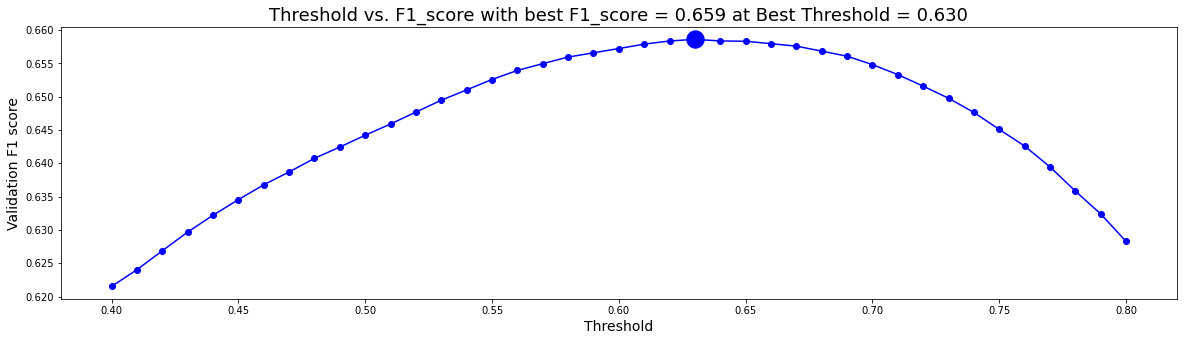

In [835]:
import matplotlib.pylab as plt
# Plot Threshold vs F1 score
plt.figure(figsize=(20,5))
plt.plot(thresholds, scores, '-o', color='blue') # plot all threshold & scores
plt.scatter([best_threshold], [best_score], color='blue', s=300, alpha=1) # make best point are more bigger
plt.xlabel('Threshold', size = 14)
plt.ylabel('Validation F1 score', size = 14)
plt.title(f'Threshold vs. F1_score with best F1_score = {best_score:.3f} at Best Threshold = {best_threshold:.3f}', size = 18)
plt.show()

In [347]:
print('When using optimal threshold...')
for k in range(18):
    # Compute F1 score per question
    m = f1_score(actual[k].values, (oof[k].values>best_threshold).astype('int'), average='macro') # Use best_threshold as threshold we choose
    # if values > best_threshold we will set as true or have prob to be correct in question.
    print(f'Q{k}: F1 = {m:.3f}')
 
# Compute F1 score overall
m = f1_score(actual.values.reshape((-1)).astype('int'), (oof.values.reshape((-1))>best_threshold).astype('int'), average='macro')
print(f'Overall F1 Score: {m:.3f}')

When using optimal threshold...
Q0: F1 = 0.591
Q1: F1 = 0.498
Q2: F1 = 0.500
Q3: F1 = 0.608
Q4: F1 = 0.581
Q5: F1 = 0.595
Q6: F1 = 0.572
Q7: F1 = 0.536
Q8: F1 = 0.585
Q9: F1 = 0.552
Q10: F1 = 0.555
Q11: F1 = 0.514
Q12: F1 = 0.498
Q13: F1 = 0.593
Q14: F1 = 0.562
Q15: F1 = 0.501
Q16: F1 = 0.520
Q17: F1 = 0.499
Overall F1 Score: 0.659


In [475]:
for i in pd.qcut(range(5), 1):
    print(i)

(-0.001, 4.0]
(-0.001, 4.0]
(-0.001, 4.0]
(-0.001, 4.0]
(-0.001, 4.0]


[Interval(1.999, 2.118, closed='right'),
 Interval(1.999, 2.118, closed='right'),
 Interval(2.118, 2.236, closed='right'),
 Interval(2.236, 2.354, closed='right'),
 Interval(2.354, 2.472, closed='right'),
 Interval(2.472, 2.59, closed='right'),
 Interval(2.59, 2.708, closed='right'),
 Interval(2.59, 2.708, closed='right'),
 Interval(2.708, 2.826, closed='right'),
 Interval(2.826, 2.944, closed='right'),
 Interval(2.944, 3.062, closed='right'),
 Interval(3.062, 3.18, closed='right'),
 Interval(3.18, 3.298, closed='right'),
 Interval(3.298, 3.416, closed='right'),
 Interval(3.298, 3.416, closed='right'),
 Interval(3.416, 3.534, closed='right'),
 Interval(3.534, 3.652, closed='right'),
 Interval(3.652, 3.77, closed='right'),
 Interval(3.77, 3.888, closed='right'),
 Interval(3.888, 4.006, closed='right'),
 Interval(3.888, 4.006, closed='right'),
 Interval(4.006, 4.124, closed='right'),
 Interval(4.124, 4.242, closed='right'),
 Interval(4.242, 4.36, closed='right'),
 Interval(4.36, 4.478, c